### Import and Data Description

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Data: https://www.kaggle.com/datasets/sudhanshu2198/processed-data-credit-score
df = pd.read_csv("/kaggle/input/processed-data-credit-score/Score.csv")
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949


After loading the data, we see that there are multiple columns, both numerical and categorical. The algorithm that we are targetting here is KNN, which only accepts numerical column. So, we would select only numerical columns.

In [3]:
df = df[["Credit_Utilization_Ratio", 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance',\
        'Annual_Income', 'Monthly_Inhand_Salary','Changed_Credit_Limit', 'Outstanding_Debt', \
        'Total_EMI_per_month', 'Credit_Score']] 

In [4]:
df.head()

,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Annual_Income,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Credit_Score
0,26.822620,265.0,80.415295,312.494089,19114.12,1824.843333,11.27,809.98,49.574949,Good
1,31.944960,265.0,118.280222,284.629162,19114.12,1824.843333,11.27,809.98,49.574949,Good
2,28.609352,267.0,81.699521,331.209863,19114.12,1824.843333,11.27,809.98,49.574949,Good
3,31.377862,268.0,199.458074,223.451310,19114.12,1824.843333,11.27,809.98,49.574949,Good
4,24.797347,269.0,41.420153,341.489231,19114.12,1824.843333,11.27,809.98,49.574949,Good


As seen in the data that is shown above, now we have only the numerical columns and we are good to proceed ahead.

In [5]:
df.columns

Index(['Credit_Utilization_Ratio', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt',
       'Total_EMI_per_month', 'Credit_Score'],
      dtype='object')

In [6]:
df.describe()

,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Annual_Income,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
count,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000
mean,32.284544,221.122819,193.665219,403.445100,50498.704153,4196.814288,10.396953,1426.514966,105.565802
std,5.116888,99.696084,194.782737,214.387092,38294.243161,3186.518163,6.510846,1155.252504,125.820983
min,20.000000,1.000000,0.000000,0.007760,7005.930000,303.645417,0.500000,0.230000,0.000000
25%,28.052051,144.000000,73.708522,270.317007,19338.480000,1626.594167,5.500000,566.080000,29.054273
50%,32.305470,219.000000,129.342067,337.237873,36996.830000,3091.386667,9.340000,1166.470000,66.058063
75%,36.496305,302.000000,234.323706,471.904834,71681.400000,5957.715000,14.680000,1948.200000,145.584994
max,50.000000,404.000000,1977.326102,1602.040519,179987.280000,15204.633333,29.980000,4998.070000,1779.103254


Looking at the Description of the data, we do see some skewness in the data and some irregularities, which we will deal with in the Feature engineering section.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Credit_Utilization_Ratio  99960 non-null  float64
 1   Credit_History_Age        99960 non-null  float64
 2   Amount_invested_monthly   99960 non-null  float64
 3   Monthly_Balance           99960 non-null  float64
 4   Annual_Income             99960 non-null  float64
 5   Monthly_Inhand_Salary     99960 non-null  float64
 6   Changed_Credit_Limit      99960 non-null  float64
 7   Outstanding_Debt          99960 non-null  float64
 8   Total_EMI_per_month       99960 non-null  float64
 9   Credit_Score              99960 non-null  object 
dtypes: float64(9), object(1)
memory usage: 7.6+ MB


In [8]:
df.isna().sum()

Credit_Utilization_Ratio    0
Credit_History_Age          0
Amount_invested_monthly     0
Monthly_Balance             0
Annual_Income               0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
Credit_Score                0
dtype: int64

Checking the Info and the NA values, we again see all the values are Numerical columns and there are no NA values. So we would not focus on this part.

### EDA

We would take a look at some of the graphs and understand the data better.

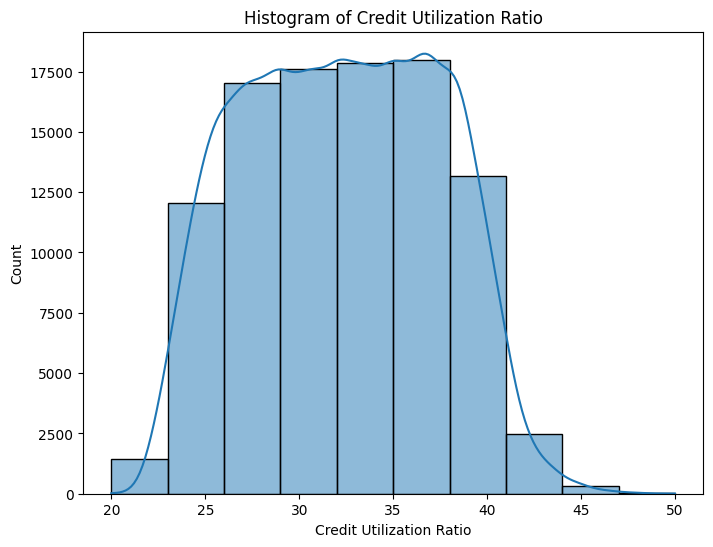

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Credit_Utilization_Ratio', bins=10, kde=True)
plt.title('Histogram of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Count')
plt.show()

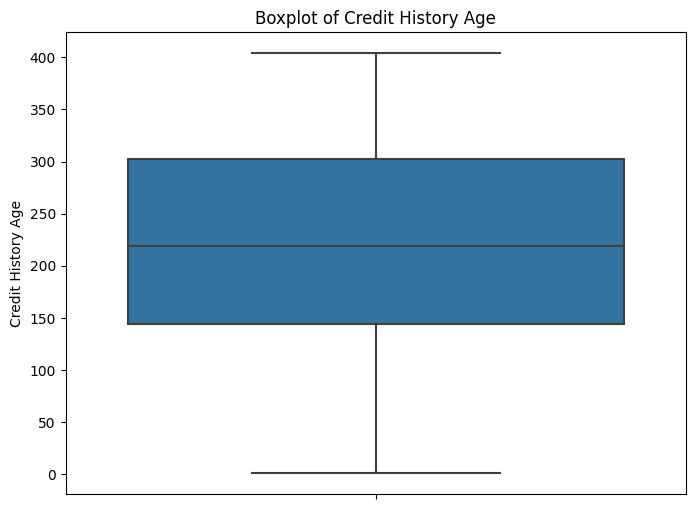

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Credit_History_Age')
plt.title('Boxplot of Credit History Age')
plt.ylabel('Credit History Age')
plt.show()

Credit Utilization Ratio and Credit_History_Age seem well distributed with very less outliers. 

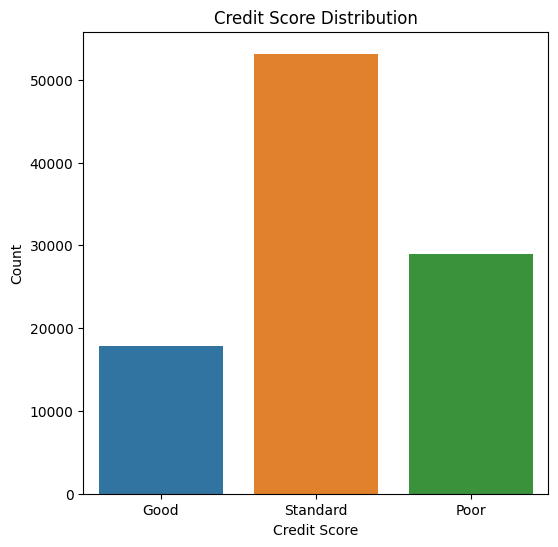

In [11]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Credit_Score')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

Credit Score is our target variable and we see it is not very well balanced. The maximum values are for Standard. Since we are going to perform Classification, we would perform Oversampling and fix this before training the model.

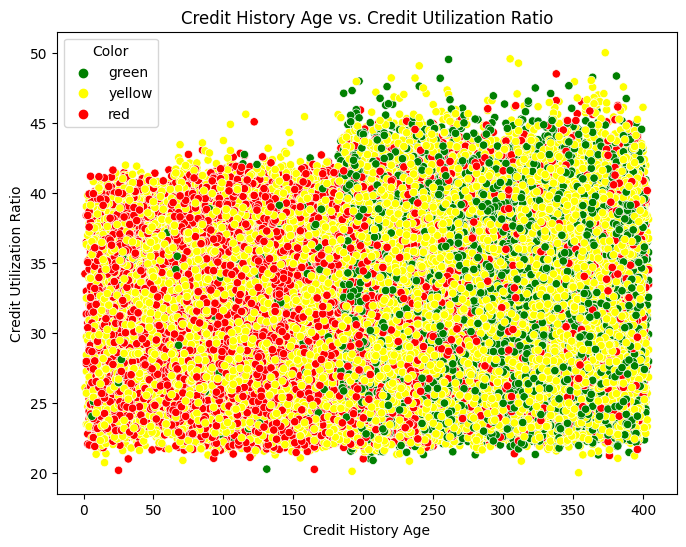

In [12]:
# Map Credit_Score to colors
color_map = {'Good': 'green', 'Standard': 'yellow', 'Poor': 'red'}
df['Color'] = df['Credit_Score'].map(color_map)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Credit_History_Age', y='Credit_Utilization_Ratio', hue='Color', palette=color_map.values())
plt.title('Credit History Age vs. Credit Utilization Ratio')
plt.xlabel('Credit History Age')
plt.ylabel('Credit Utilization Ratio')
plt.show()

Looking at Credit History Age vs. Credit Utilization Ratio, we see how Poor and Good scores are clearly distributed, this concludes, someone having a good Credit History and Utilization is very much dependent on the values.

We even see some Green values towards left side as well.

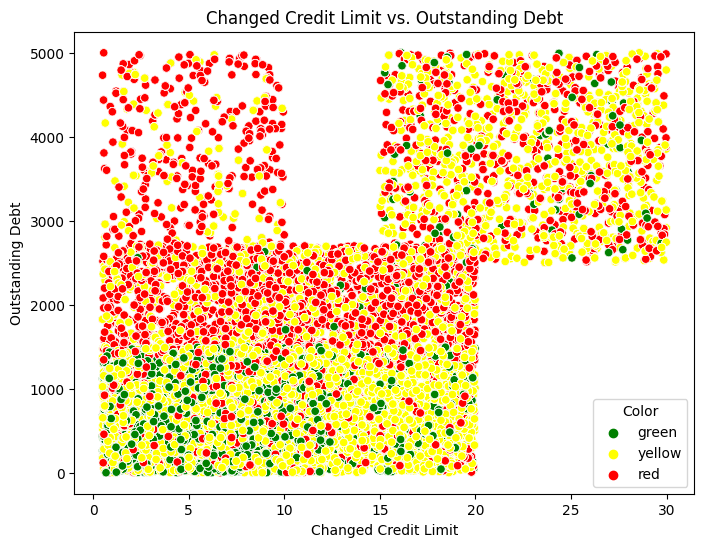

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Changed_Credit_Limit', y='Outstanding_Debt', hue='Color', palette=color_map.values())
plt.title('Changed Credit Limit vs. Outstanding Debt')
plt.xlabel('Changed Credit Limit')
plt.ylabel('Outstanding Debt')
plt.show()

We see a similar behaviour in this graph as well, the Green and Red values are classified very distinctly. And even for the Yellow regions, there are certain parts. This also states that both this could be excellent features for the building the model. We will see this during feature selection. 

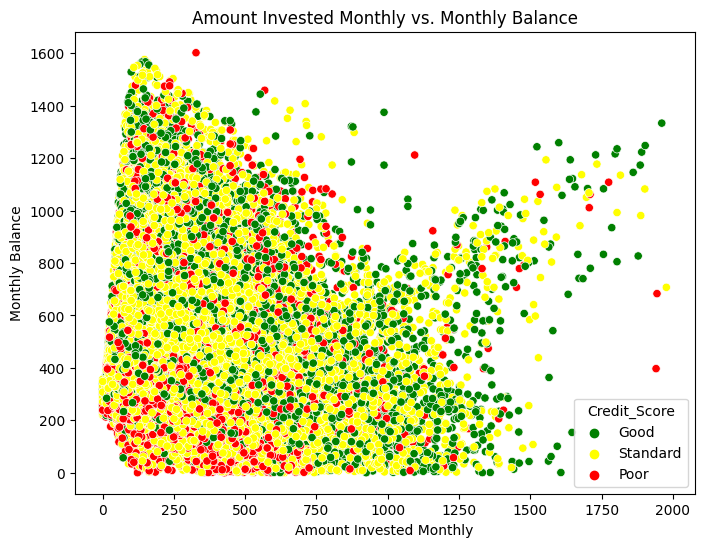

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Amount_invested_monthly', y='Monthly_Balance', hue='Credit_Score', palette=color_map.values())
plt.title('Amount Invested Monthly vs. Monthly Balance')
plt.xlabel('Amount Invested Monthly')
plt.ylabel('Monthly Balance')
plt.show()

We tried doing the same thing again, for Amount Invested Monthly vs. Monthly Balance. But the results are random, having all the values spread everywhere. Again, indicating, both the features might not be the best for training the model.

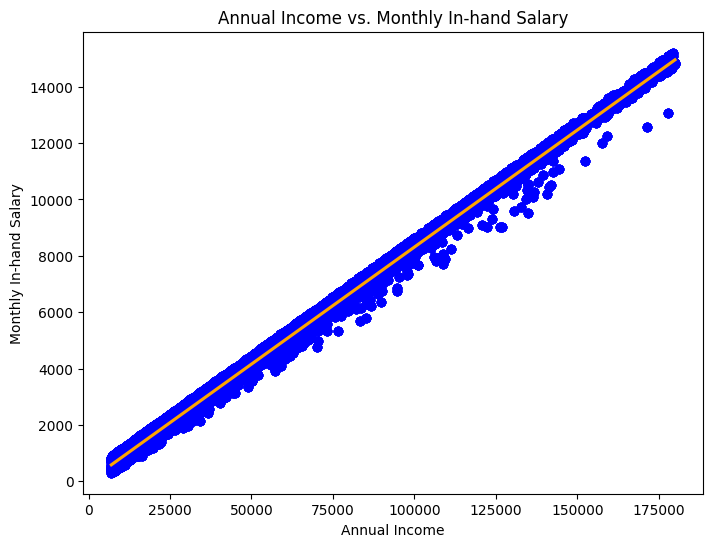

In [15]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Annual_Income', y='Monthly_Inhand_Salary', scatter_kws={'color': 'blue'}, line_kws={'color': 'orange'})
plt.title('Annual Income vs. Monthly In-hand Salary')
plt.xlabel('Annual Income')
plt.ylabel('Monthly In-hand Salary')
plt.show()

We then plot Annual Income vs. Monthly In-hand Salary, to see if the trend is linear and dependednt or, if there is some other trend. 

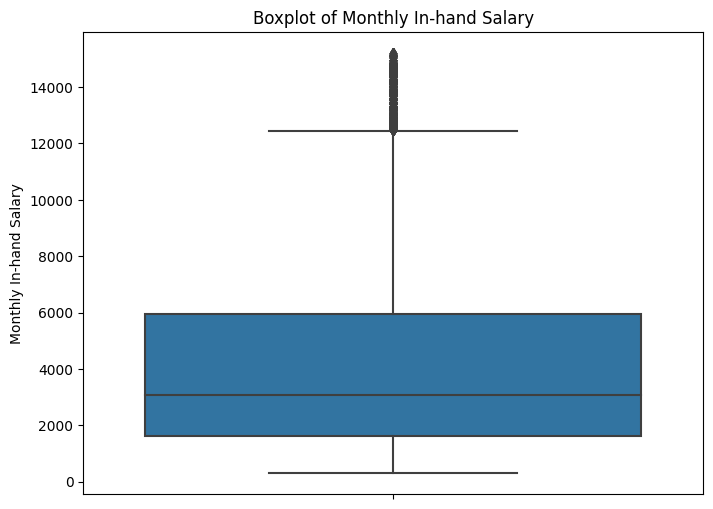

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Monthly_Inhand_Salary')
plt.title('Boxplot of Monthly In-hand Salary')
plt.ylabel('Monthly In-hand Salary')
plt.show()

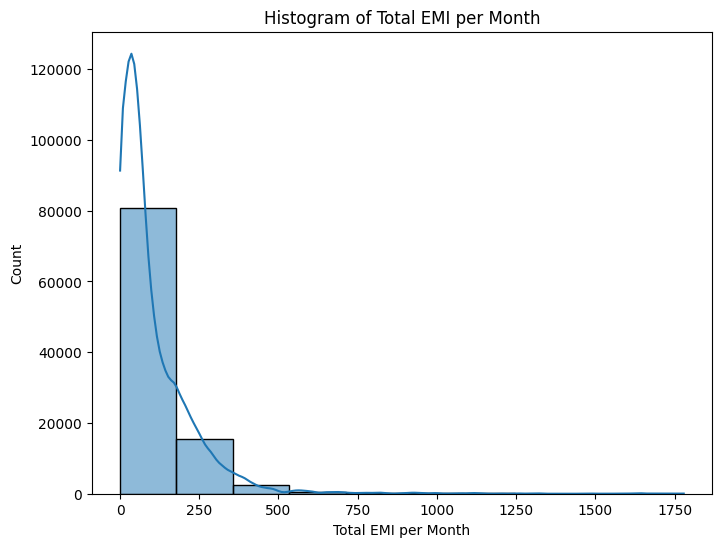

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Total_EMI_per_month', bins=10, kde=True)
plt.title('Histogram of Total EMI per Month')
plt.xlabel('Total EMI per Month')
plt.ylabel('Count')
plt.show()

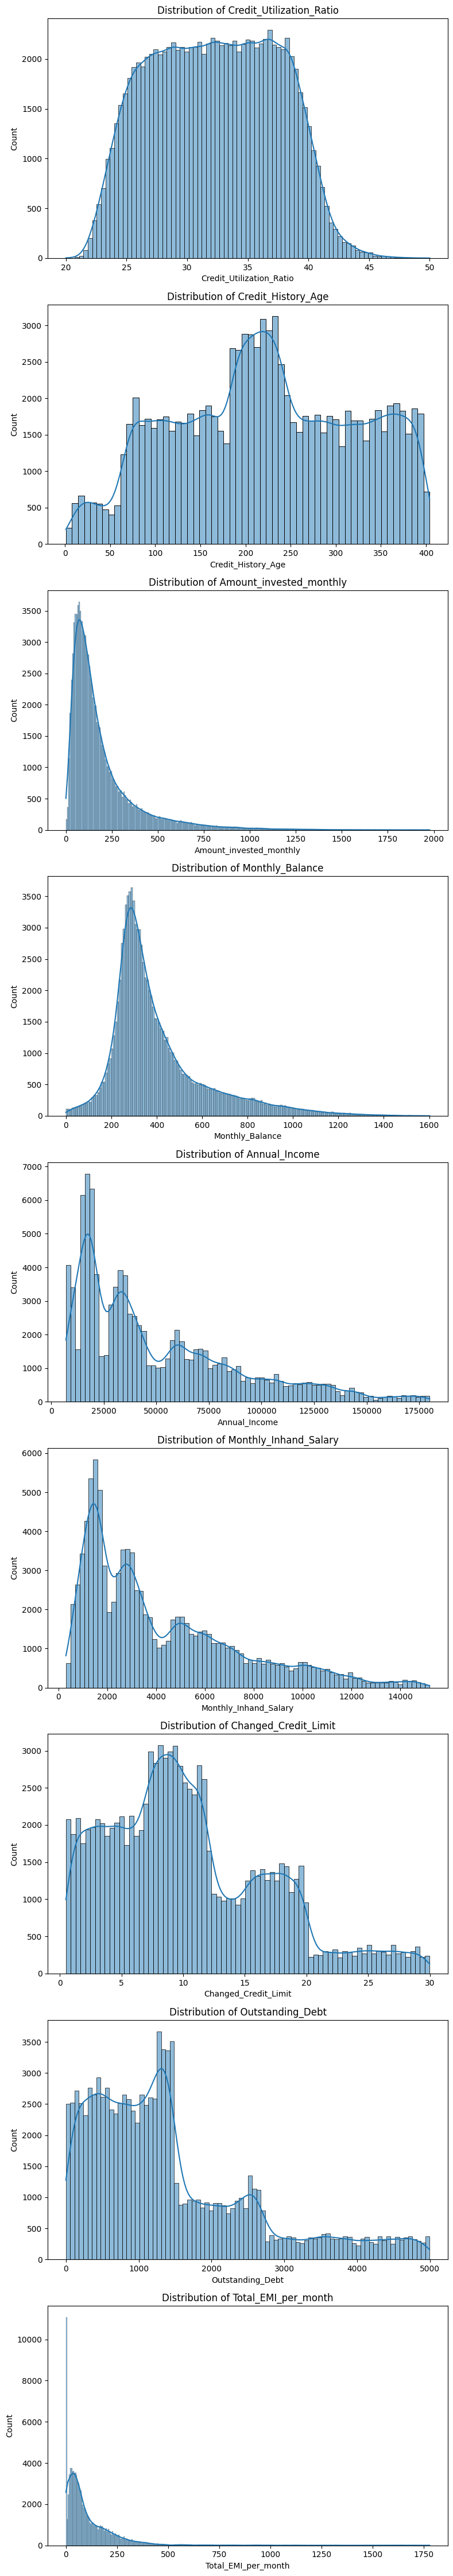

In [18]:
cols_to_plot = ['Credit_Utilization_Ratio', 'Credit_History_Age', 'Amount_invested_monthly',
                'Monthly_Balance', 'Annual_Income', 'Monthly_Inhand_Salary',
                'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month']

# Create subplots
num_plots = len(cols_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 5*num_plots))

# Plot histograms for each feature
for i, col in enumerate(cols_to_plot):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Finally, we plot some distributions of certain features. Because of these features, we know which of them should be transformed. And we would do so in the coming section.q

### Feature Engineering

<b> We would be performing these techniques in the notebook: </b>


* Non-Gaussian distributed variables


* Outlier treatment


* Categorical variables: convert strings to numbers


* Standardize the values of the variables to the same range


* Feature Selection

#### Non-Gaussian distributed variables

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


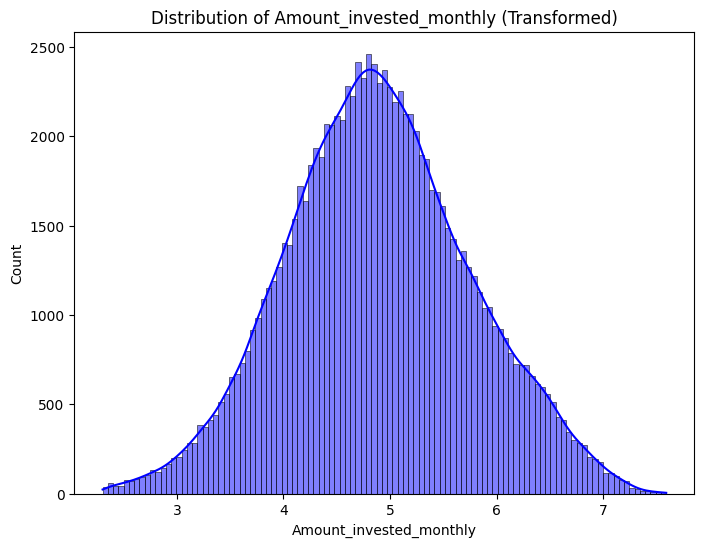

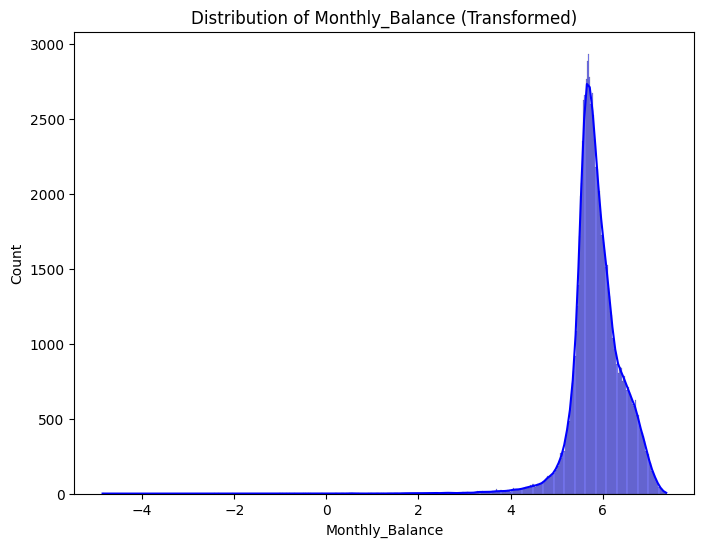

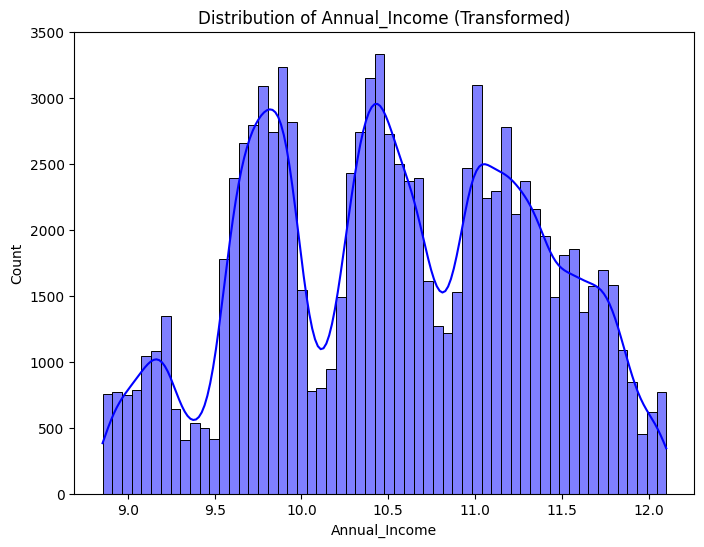

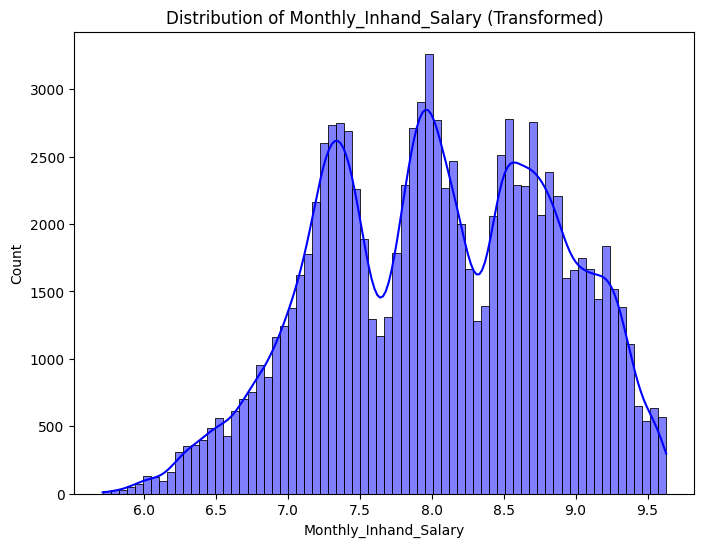

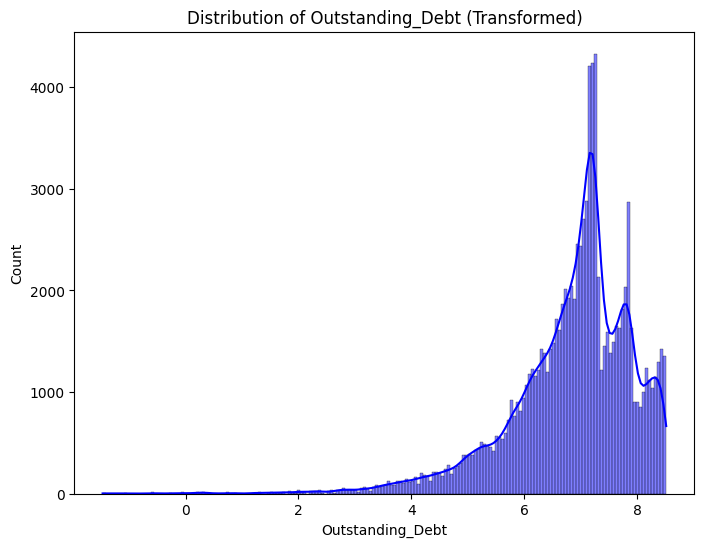

In [19]:
# List of columns to transform
columns_to_transform = ['Amount_invested_monthly', 'Monthly_Balance', 'Annual_Income',
                        'Monthly_Inhand_Salary', 'Outstanding_Debt']

# Apply logarithm transformation to approximate normality and plot histograms
for col in columns_to_transform:
    # Apply logarithm transformation to the column
    df[col] = np.log(df[col])
    
    # Plot histogram for the transformed column
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True, color='blue')
    plt.title(f'Distribution of {col} (Transformed)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

KNN is one such algorithm which is very sensitive to the extreme outliers and skewed distributions. Most classification algorithms are like this. So, as per what we saw in the previous graphs, we will fix the distributions of the features. 

'Amount_invested_monthly', 'Monthly_Balance', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt' are the features, on which we would apply Log Transformation. 
There are even more ways to do this transformation, but log transform is the best for our case. Other transformation like inverse and power transform are changing the graphs from right skew to left skew and vice versa.

#### Outliers

In [20]:
df = df.replace([np.inf, -np.inf], np.nan)

In [21]:
df.isna().sum()

Credit_Utilization_Ratio      0
Credit_History_Age            0
Amount_invested_monthly     169
Monthly_Balance               0
Annual_Income                 0
Monthly_Inhand_Salary         0
Changed_Credit_Limit          0
Outstanding_Debt              0
Total_EMI_per_month           0
Credit_Score                  0
Color                         0
dtype: int64

In the process of removing outliers, we notice some NA values are introduced in our data because of Log Transform. We see the number is just 169, so we drop these values and proceed.

In [22]:
df = df.dropna()

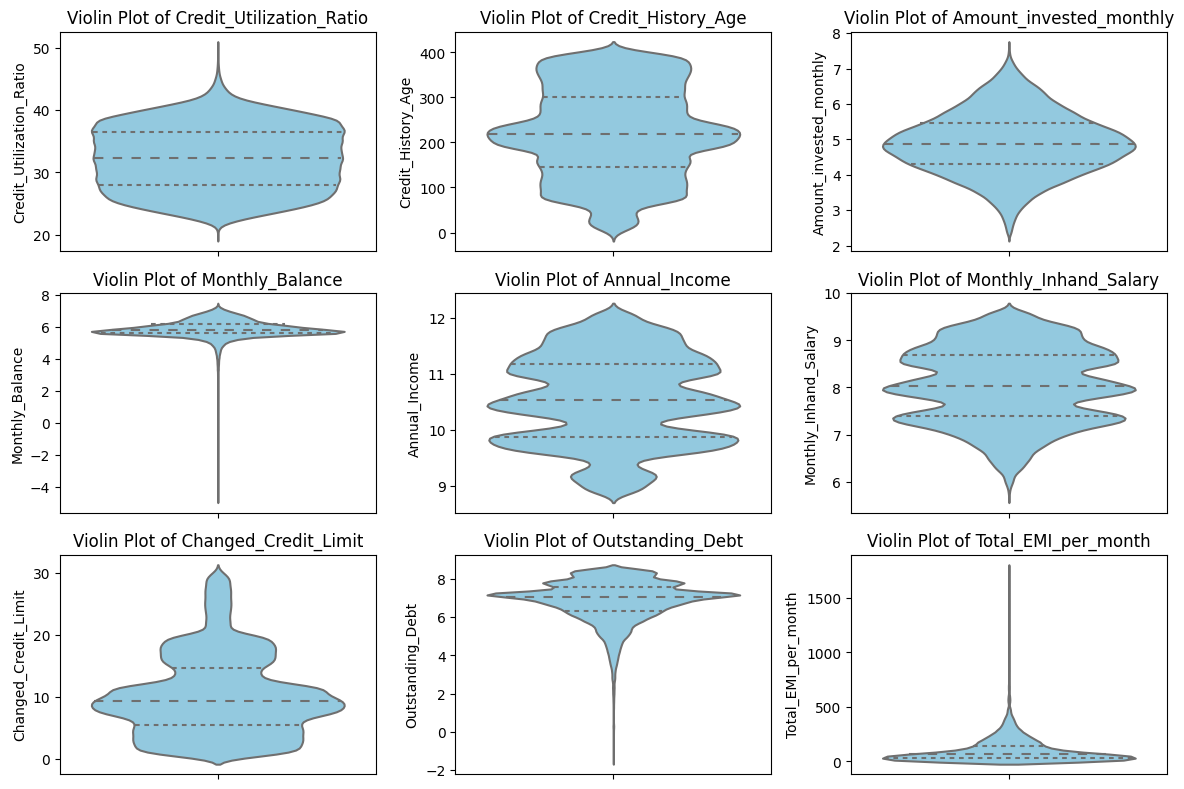

In [23]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(data=df, y=col, color='skyblue', inner='quartile')
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Looking at the Voilin plots above, we understand that 'Credit_History_Age', 'Monthly_Balance', 'Outstanding_Debt', 'Total_EMI_per_month' are the features to be fixed. We would use IQR method and do this.

We would also keep printing how many rows are being removed, this ensures that not a lot of data gets removed.

In [24]:
# List of columns to remove outliers from
columns_to_remove_outliers = ['Credit_History_Age', 'Monthly_Balance', 'Outstanding_Debt', 'Total_EMI_per_month']

# Function to remove outliers using IQR method
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    initial_rows = data.shape[0]
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    removed_rows = initial_rows - data.shape[0]
    print(f"Removed {removed_rows} rows from '{col}' column.")
    return data

# Remove outliers from the specified columns
for col in columns_to_remove_outliers:
    df = remove_outliers_iqr(df, col)

# Now, df contains the data with outliers removed for the specified columns


Removed 0 rows from 'Credit_History_Age' column.
Removed 3562 rows from 'Monthly_Balance' column.
Removed 3669 rows from 'Outstanding_Debt' column.
Removed 4862 rows from 'Total_EMI_per_month' column.


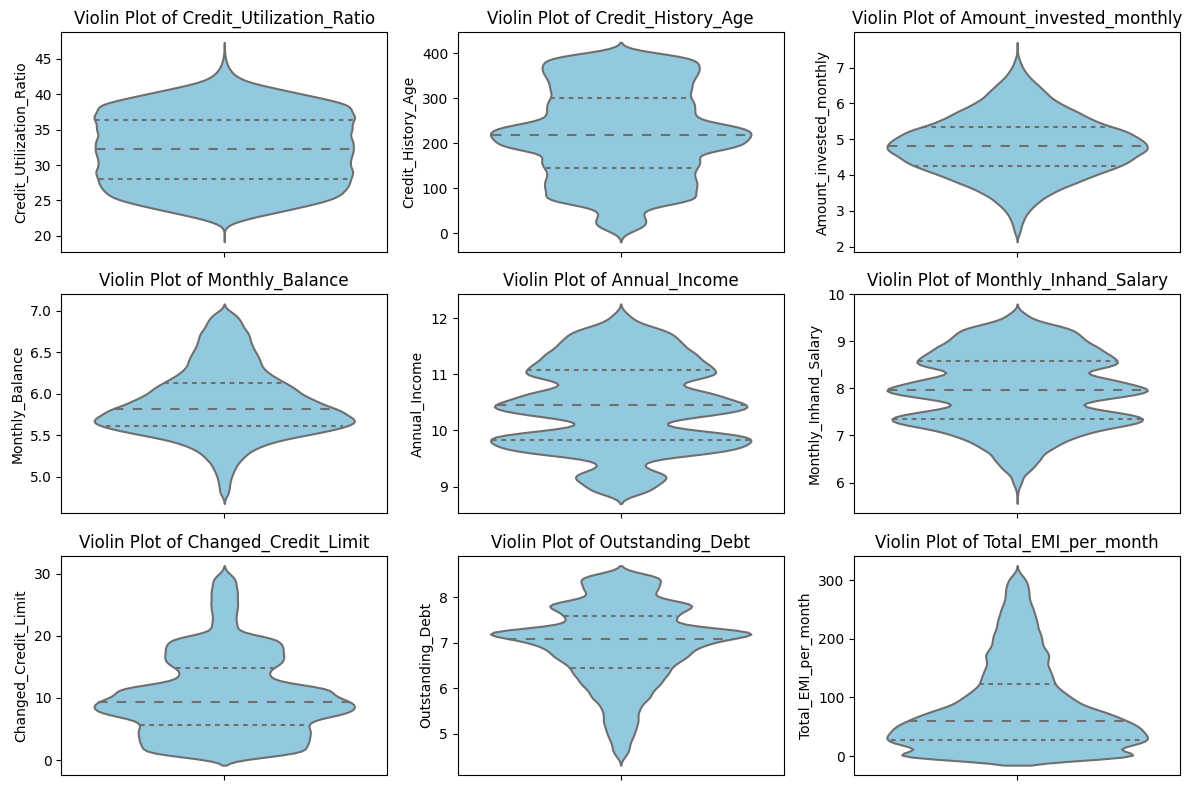

In [25]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(data=df, y=col, color='skyblue', inner='quartile')
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Looking at the graphs now, they are much better and well distributed. There are some outliers but they fall under the IQR conditions.

In [26]:
df = df.drop(['Color'], axis = 1)

#### Categorical variables: convert strings to numbers

In the very beginning, we discussed about KNN algorithm working with Numerical Features only, we have only one categorical feature here, which is the target variable. We will change it.

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col_list = df.select_dtypes(include="object").columns

for col in col_list:
    df["Credit_Score"] = le.fit_transform(df["Credit_Score"].astype(str))

In [28]:
df.head()

,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Annual_Income,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Credit_Score
0,26.822620,265.0,4.387204,5.744586,9.858183,7.509249,11.27,6.69701,49.574949,0
1,31.944960,265.0,4.773057,5.651187,9.858183,7.509249,11.27,6.69701,49.574949,0
2,28.609352,267.0,4.403048,5.802752,9.858183,7.509249,11.27,6.69701,49.574949,0
3,31.377862,268.0,5.295604,5.409194,9.858183,7.509249,11.27,6.69701,49.574949,0
4,24.797347,269.0,3.723768,5.833316,9.858183,7.509249,11.27,6.69701,49.574949,0


#### Standardize the values of the variables to the same range

We will bring the values to same scale for better fit of algorithm.

In [29]:
from sklearn.preprocessing import StandardScaler

cols = list(df.columns)[:-1]
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

#### Feature Selection

Now, let us start with feature selection and see which are the best features. We would use f_classif from sklearn for this.

In [30]:
y = df["Credit_Score"]
X = df[cols]

In [31]:
features = list(df.columns)[:-1]
print("features:", features, sep="\n")

features:
['Credit_Utilization_Ratio', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance', 'Annual_Income', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month']


In [32]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)

X_new = selector.transform(X)
#print(data.columns[selector.get_support(indices=True)].tolist())
final_features = df.columns[selector.get_support(indices=True)].tolist()
print(final_features)

['Credit_History_Age', 'Monthly_Balance', 'Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt']


['Credit_History_Age', 'Monthly_Balance', 'Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt']

These are the top 5 features that have been selected by the algorithm. Now, let us start training the model.

In [33]:
y = df["Credit_Score"]
X = df[final_features]

### Modelling

* Oversampling the target class

* Training the model

* Performing best parameter selection and training again

* Result comparision

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

During EDA, we saw that the target variable values for the respective classes was not balanced, we will perform Oversampling and fix this.

In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 46840, 2: 46840, 1: 46840})


We see all the classes under the target variable have equal weights now. We are good to start the model training.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [38]:
pred = neigh.predict(X_test)

In [39]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8135852547680046
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      9373
           1       0.82      0.88      0.85      9367
           2       0.82      0.61      0.70      9364

    accuracy                           0.81     28104
   macro avg       0.81      0.81      0.81     28104
weighted avg       0.81      0.81      0.81     28104



In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


knn_classifier = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]
}

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best KNN Model Accuracy: {accuracy:.2f}")
print("Best Hyperparameters:", best_params)


Best KNN Model Accuracy: 0.85
Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      9373
           1       0.85      0.90      0.87      9367
           2       0.84      0.70      0.77      9364

    accuracy                           0.85     28104
   macro avg       0.85      0.85      0.85     28104
weighted avg       0.85      0.85      0.85     28104



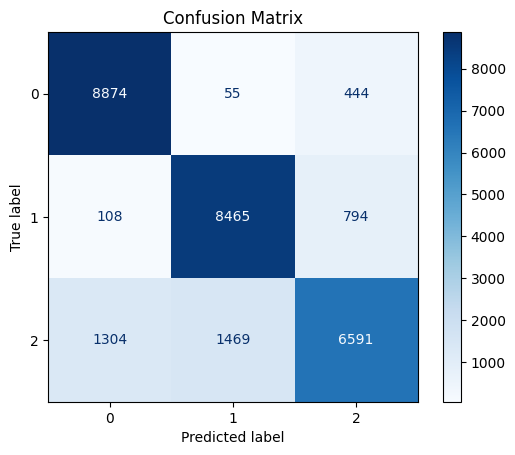

F1 Score: 0.85
ROC AUC Score: 0.93


In [41]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=best_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

# ROC AUC Score
y_prob = best_knn.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")

## Pipelining

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

In [43]:
df = pd.read_csv("/kaggle/input/processed-data-credit-score/Score.csv")
df = df[["Credit_Utilization_Ratio", 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance',\
        'Annual_Income', 'Monthly_Inhand_Salary','Changed_Credit_Limit', 'Outstanding_Debt', \
        'Total_EMI_per_month', 'Credit_Score']] 

class TargetLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = LabelEncoder()

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X, y=None):
        return self.encoder.transform(X)

def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    initial_rows = data.shape[0]
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    removed_rows = initial_rows - data.shape[0]
    print(f"Removed {removed_rows} rows from '{col}' column.")
    return data
target_label_encoder = TargetLabelEncoder()

In [44]:
df.head()

,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Annual_Income,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Credit_Score
0,26.822620,265.0,80.415295,312.494089,19114.12,1824.843333,11.27,809.98,49.574949,Good
1,31.944960,265.0,118.280222,284.629162,19114.12,1824.843333,11.27,809.98,49.574949,Good
2,28.609352,267.0,81.699521,331.209863,19114.12,1824.843333,11.27,809.98,49.574949,Good
3,31.377862,268.0,199.458074,223.451310,19114.12,1824.843333,11.27,809.98,49.574949,Good
4,24.797347,269.0,41.420153,341.489231,19114.12,1824.843333,11.27,809.98,49.574949,Good


In [45]:
# Columns to apply log transform to
log_transform_cols = ['Amount_invested_monthly', 'Monthly_Balance', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt']

# Apply log transform
df['Amount_invested_monthly'] = np.log(df['Amount_invested_monthly'])
df['Monthly_Balance'] = np.log(df['Monthly_Balance'])
df['Annual_Income'] = np.log(df['Annual_Income'])
df['Monthly_Inhand_Salary'] = np.log(df['Monthly_Inhand_Salary'])
df['Outstanding_Debt'] = np.log(df['Outstanding_Debt'])

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
columns_to_remove_outliers = ['Credit_History_Age', 'Monthly_Balance', 'Outstanding_Debt', 'Total_EMI_per_month']
for col in columns_to_remove_outliers:
    df = remove_outliers_iqr(df, col)

Removed 0 rows from 'Credit_History_Age' column.
Removed 3562 rows from 'Monthly_Balance' column.
Removed 3669 rows from 'Outstanding_Debt' column.
Removed 4862 rows from 'Total_EMI_per_month' column.


In [47]:
df.head()

,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Annual_Income,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Credit_Score
0,26.822620,265.0,4.387204,5.744586,9.858183,7.509249,11.27,6.69701,49.574949,Good
1,31.944960,265.0,4.773057,5.651187,9.858183,7.509249,11.27,6.69701,49.574949,Good
2,28.609352,267.0,4.403048,5.802752,9.858183,7.509249,11.27,6.69701,49.574949,Good
3,31.377862,268.0,5.295604,5.409194,9.858183,7.509249,11.27,6.69701,49.574949,Good
4,24.797347,269.0,3.723768,5.833316,9.858183,7.509249,11.27,6.69701,49.574949,Good


In [48]:
from sklearn.preprocessing import StandardScaler

cols = list(df.columns)[:-1]
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

In [49]:
y = target_label_encoder.fit_transform(df["Credit_Score"])
X = df.drop("Credit_Score", axis=1)

In [50]:
features = list(df.columns)[:-1]
print("features:", features, sep="\n")

features:
['Credit_Utilization_Ratio', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance', 'Annual_Income', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month']


In [51]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)

X_new = selector.transform(X)
#print(data.columns[selector.get_support(indices=True)].tolist())
final_features = df.columns[selector.get_support(indices=True)].tolist()
print(final_features)

['Credit_History_Age', 'Monthly_Balance', 'Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt']


In [52]:
y = df["Credit_Score"]
X = df[final_features]

In [53]:
# Define pipeline
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

pipeline = ImbPipeline(steps=[
    ('classifier', GridSearchCV(KNeighborsClassifier(), param_grid={
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }, cv=5, scoring='accuracy'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Best KNN Model Accuracy: {accuracy:.2f}")
print("Best Hyperparameters:", pipeline.named_steps['classifier'].best_params_)

Best KNN Model Accuracy: 0.85
Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [55]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        Good       0.86      0.95      0.90      9373
        Poor       0.85      0.90      0.87      9367
    Standard       0.83      0.70      0.76      9364

    accuracy                           0.85     28104
   macro avg       0.85      0.85      0.85     28104
weighted avg       0.85      0.85      0.85     28104



## Saving and reloading model

In [56]:
import pickle

with open('knn_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)


In [57]:
with open('knn_model.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)


In [58]:
y_pred_loaded = loaded_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_loaded)

print(f"Best KNN Model Accuracy: {accuracy:.2f}")
print("Best Hyperparameters:", loaded_pipeline.named_steps['classifier'].best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_loaded))

Best KNN Model Accuracy: 0.85
Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

        Good       0.86      0.95      0.90      9373
        Poor       0.85      0.90      0.87      9367
    Standard       0.83      0.70      0.76      9364

    accuracy                           0.85     28104
   macro avg       0.85      0.85      0.85     28104
weighted avg       0.85      0.85      0.85     28104



We get the same results as above.